<b>Basics</b>
<br/><br/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
imdb_data = pd.read_csv("IMDB Dataset.csv")

In [3]:
imdb_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
imdb_data1 = imdb_data.loc[0:1499]

In [5]:
imdb_data1

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
1495,"This movie is terrible, it was so difficult to...",negative
1496,The only thing serious about this movie is the...,positive
1497,2005 was one of the best year for movies. We h...,positive
1498,"According to John Ford's lyrically shot, ficti...",positive


<b>Data analysis</b>
<br/><br/>

In [6]:
imdb_data1.describe()

,review,sentiment
count,1500,1500
unique,1500,2
top,I have a 19-month old and got really tired of ...,positive
freq,1,767


In [7]:
imdb_data1.groupby('sentiment').describe().transpose()

sentiment                                               negative  \
review count                                                 733   
       unique                                                733   
       top     Very strange but occasionally elegant exploita...   
       freq                                                    1   

sentiment                                               positive  
review count                                                 767  
       unique                                                767  
       top     I have a 19-month old and got really tired of ...  
       freq                                                    1

In [8]:
imdb_data1['length'] = imdb_data1['review'].apply(len)

<ipython-input-8-08e489446811>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_data1['length'] = imdb_data1['review'].apply(len)


In [9]:
imdb_data1.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [10]:
print(imdb_data1['review'][1])

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.


<b>Exploratory data analysis (EDA)</b>
<br/><br/>

Text(0.5, 1.0, 'Length Histogram')

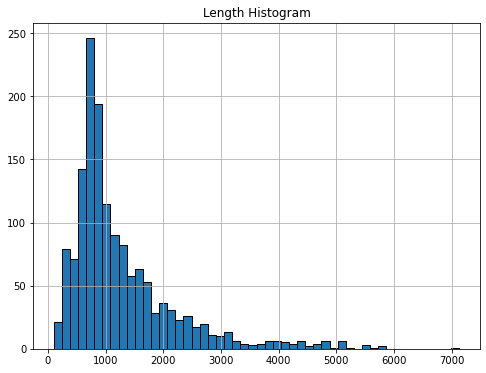

In [11]:
plt.figure(figsize = (8,6))
imdb_data1['length'].hist(bins = 50,edgecolor = 'Black')
plt.title('Length Histogram')

In [12]:
imdb_data1['length'].describe()

count    1500.000000
mean     1271.792667
std       939.548782
min        98.000000
25%       695.750000
50%       941.000000
75%      1569.250000
max      7134.000000
Name: length, dtype: float64

In [13]:
imdb_data1[imdb_data1['length'] == 7134]['review']

556    I thought that ROTJ was clearly the best out o...
Name: review, dtype: object

array([<AxesSubplot:title={'center':'negative'}>,
       <AxesSubplot:title={'center':'positive'}>], dtype=object)

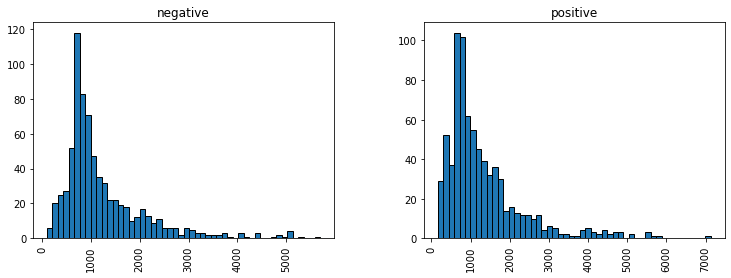

In [14]:
imdb_data1.hist(column = 'length',by = 'sentiment',figsize = (12,4),edgecolor = 'Black',bins = 50)

<b>Text Processing</b>
<br/><br/>

In [15]:
import string

In [16]:
from nltk.corpus import stopwords

In [17]:
def text_processing(review):
    """
    1. Remove br tag
    2. Removes the punctuation in the reviews
    3. Joining of characters
    4. Removes the stopwords
    5. Returns a list of the non punctuated sentence
    
    """
    
    if '<br' in review.split():
        review_split = review.split()
        review_split.remove('<br')
        review= ' '.join(review_split)
    
    nopunctuation = [char for char in review if char not in string.punctuation]

    nopunctuation = ''.join(nopunctuation)
    
    return [word for word in nopunctuation.split() if word.lower() not in stopwords.words('english')]

In [18]:
text_processing('Dummy message. <br />Note: This has punctuation!!')

['Dummy', 'message', 'Note', 'punctuation']

In [19]:
imdb_data1['review'].head(5).apply(text_processing)

0    [One, reviewers, mentioned, watching, 1, Oz, e...
1    [wonderful, little, production, br, filming, t...
2    [thought, wonderful, way, spend, time, hot, su...
3    [Basically, theres, family, little, boy, Jake,...
4    [Petter, Matteis, Love, Time, Money, visually,...
Name: review, dtype: object

<b>Bag-of-words Technique(CountVectorizer,Text Frequency - Inverse Document Frequency) and Multinomial Naive-Bayes</b>
<br/><br/>

In [20]:
from sklearn.model_selection import train_test_split

review_train,review_test,label_train,label_test = train_test_split(imdb_data1['review'],imdb_data1['sentiment'],test_size = 0.3)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

bag_of_words_transformer = CountVectorizer(analyzer = text_processing).fit(review_train)
print(len(bag_of_words_transformer.vocabulary_))
review_bag_of_words = bag_of_words_transformer.transform(review_train)

23437


In [22]:
print('Shape of Sparse Matrix: ',review_bag_of_words.shape)
review_bag_of_words.nnz
sparsity = (100.0 * review_bag_of_words.nnz / (review_bag_of_words.shape[0] * review_bag_of_words.shape[1]))
print('sparsity: {}'.format((sparsity)))

Shape of Sparse Matrix:  (1050, 23437)
sparsity: 0.42240494781348986


In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(review_bag_of_words)
review_tfidf = tfidf_transformer.transform(review_bag_of_words)

In [24]:
from sklearn.naive_bayes import MultinomialNB
rsa_model = MultinomialNB().fit(review_tfidf,label_train)

In [25]:
bag_of_words_transformer = CountVectorizer(analyzer = text_processing).fit(review_train)
print(len(bag_of_words_transformer.vocabulary_))

review1_bag_of_words = bag_of_words_transformer.transform(review_test)

print('Shape of Sparse Matrix: ',review1_bag_of_words.shape)
review1_bag_of_words.nnz

sparsity = (100.0 * review1_bag_of_words.nnz / (review1_bag_of_words.shape[0] * review1_bag_of_words.shape[1]))
print('sparsity: {}'.format((sparsity)))

tfidf_transformer = TfidfTransformer().fit(review1_bag_of_words)
review1_tfidf = tfidf_transformer.transform(review1_bag_of_words)

23437
Shape of Sparse Matrix:  (450, 23437)
sparsity: 0.37169148497390164


In [26]:
predictions = rsa_model.predict(review1_tfidf)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(label_test,predictions))
print('\n')
print(confusion_matrix(label_test,predictions))

              precision    recall  f1-score   support

    negative       0.90      0.74      0.81       231
    positive       0.77      0.92      0.84       219

    accuracy                           0.83       450
   macro avg       0.84      0.83      0.83       450
weighted avg       0.84      0.83      0.83       450



[[171  60]
 [ 18 201]]


Text(69.0, 0.5, 'Actual Labels')

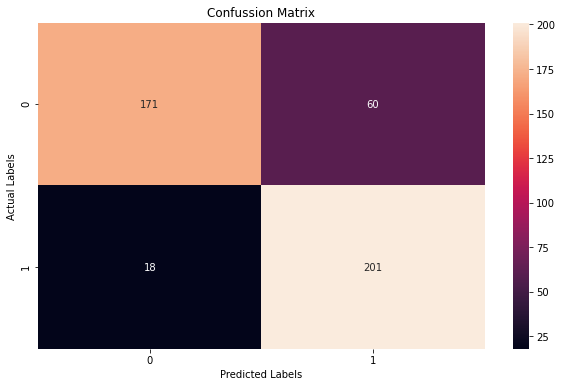

In [29]:
plt.figure(figsize = (10,6))

sns.heatmap(confusion_matrix(label_test,predictions),annot = True,fmt = 'g')

plt.title('Confussion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

<b>Using Logestic Regression</b>
<br/><br/>

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_model = LogisticRegression()

In [32]:
log_model.fit(review_tfidf,label_train)

LogisticRegression()

In [33]:
predictions = log_model.predict(review1_tfidf)

In [34]:
print(classification_report(label_test,predictions))
print('\n')
print(confusion_matrix(label_test,predictions))

              precision    recall  f1-score   support

    negative       0.87      0.78      0.82       231
    positive       0.79      0.88      0.83       219

    accuracy                           0.83       450
   macro avg       0.83      0.83      0.83       450
weighted avg       0.83      0.83      0.83       450



[[180  51]
 [ 27 192]]


Text(69.0, 0.5, 'Actual Labels')

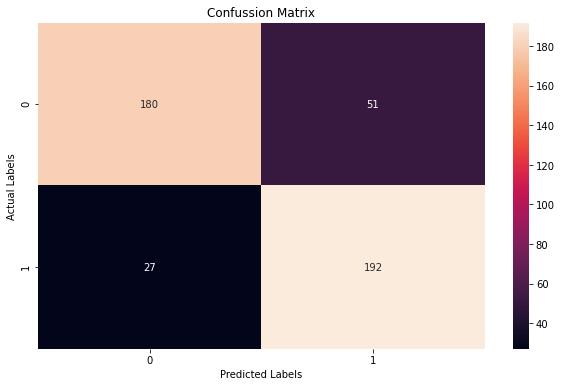

In [35]:
plt.figure(figsize = (10,6))

sns.heatmap(confusion_matrix(label_test,predictions),annot = True, fmt='g')

plt.title('Confussion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')